# What is Linear Regression?
## It is a linear model that establishes a relationship between dependent variable (Y) and one or more independent variables (X)

## OR

## Regression is a method of modelling a target value based on independent variables.

# Linear Regression in Math
## Regression means figuring out a best fit line for a linear equation
### Linear equation ==> Y = mX + b
### m --> slope of the line
### b --> intercept of the line
### X --> independent or predictor variable
### Y --> dependent or target variable

## How do we change m and b values for the best fit line??
### Either we can use an awesome algorithm called Gradient Descent Or we can borrow direct formulas from statistics(they call this Least Square Method)

### below link describes Gradient descent & Least Square Methods mathematically:
https://medium.com/deep-math-machine-learning-ai/chapter-1-2-gradient-descent-with-math-d4f2871af402

### There are three types of Gradient descent algorithms:
### 1.Batch Gradient descent Algorithm
### 2.Stochastic Gradient descent (SGD) Algorithm
### 3.Mini-Batch Gradient descent Algorithm

## Batch Gradient descent Algorithm:
### In the batch gradient descent, to calculate the gradient of the cost function, we need to sum all training examples for each steps
### Batch Gradient Descent is not good fit for large datasets

## Stochastic Gradient descent (SGD) Algorithm:
### In stochastic Gradient Descent, we use one example or one training sample at each iteration instead of using whole dataset to sum all for every steps
### SGD is widely used for larger dataset trainings and computationally faster and can be trained in parallel
### Need to randomly shuffle the training examples before calculating it

## Mini-Batch Gradient descent Algorithm:
### It is similar like SGD, it uses n samples instead of 1 at each iteration.

## 1.Building our own Simple linear regression Model using Batch Gradient descent

In [86]:
#load the test data from below link
# https://www.kaggle.com/andonians/random-linear-regression/data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df_train = pd.read_csv(r'E:\SimpliLearn\Data Science with Python\ML Algorithms Implementation\Linear Regression using Gradient\train.csv')
df_test = pd.read_csv(r'E:\SimpliLearn\Data Science with Python\ML Algorithms Implementation\Linear Regression using Gradient\test.csv')

#print(df_train.head(5))
#print(df_test.head(5))

#look at the shape of the data - (rows, columns)
print(df_train.shape)
print(df_test.shape)

#check if any null or NAN values present
print(df_train.isnull().values.any())
print(df_test.isnull().values.any())

#remove the NAN values from dataset as observed above else the calculations would go wrong
df_train = df_train.dropna()
print(df_train.shape)

#from above set, let's get train & test X, Y values
x_train = df_train['x']
y_train = df_train['y']
x_test = df_test['x']
y_test = df_test['y']

#convert it to numpy array so that we can perform numerical computing on these arrays down the line
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

(700, 2)
(300, 2)
True
False
(699, 2)


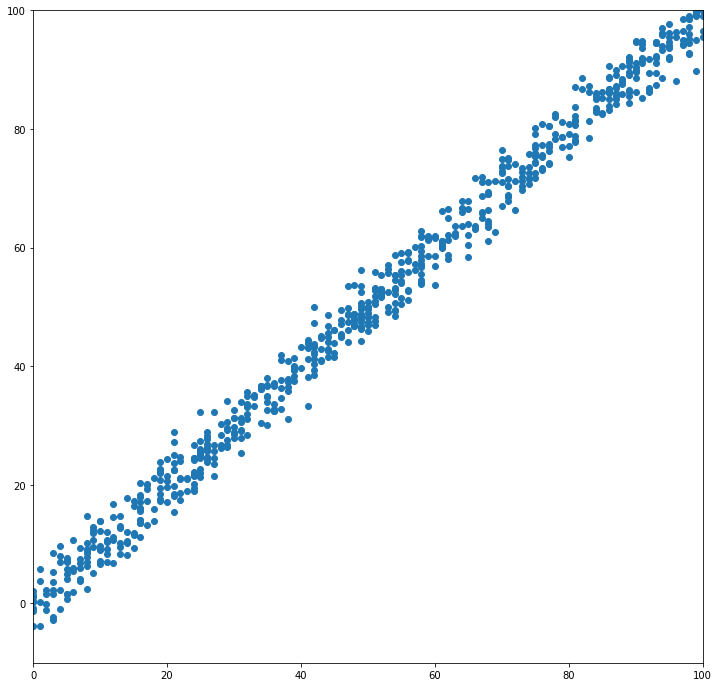

In [79]:
#Let's plot the graph against train dataset to see how data is spread
plt.figure(figsize=(12,12))
plt.axis([0,100,-10,100])
plt.scatter(x_train,y_train)
plt.show()

## Finding the best fit line for above datapoints

In [80]:
#take some random values initially for m, b for Gradient descent. better to start with (0,0)
m = 0
b = 0

#define hyperparameter -> learning rate. the smaller the learning rate, the better the accuracy would be
L = 0.0001

#define number of iterations to perform gradient descent. this doesn't matter. you can define any number of iterations
#but it would consume more time due to iterations with above small learning rate
epochs = 1000

#no of training samples
n = len(x_train)

#Hypothesis Function, Gradient descent formula to find best fitting m,b values
#h_theta = b + m*x
#m = m - L*(sum((h_theta - y))*x)/n)
#b = b - L*(sum(h_theta - y)/n)
#above formulas are derived using Cost/Loss/Error function
#cost_func = sum((h_theta - y)**2)/2*n

m_list = []

for i in range(epochs):
    y_predicted_train = b + m*x_train
    error = y_predicted_train - y_train
    D_b = np.sum(error)/n
    D_m = np.sum(error*x_train)/n
    m = m - L*D_m
    m_list.append(m)
    b = b - L*D_b
    
print(m,b)

(0.9988705055011785, 0.011937938999784084)


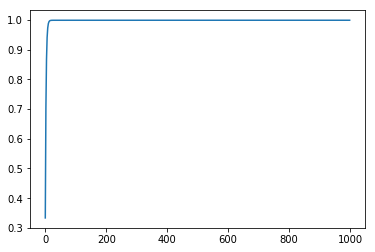

In [81]:
#plot the m-values to show how m, b values are calculated by gradient descent in loop
x_axis=[x for x in range(1000)]
plt.plot(x_axis,m_list)
plt.show()

## now lets predict for test data using above m,b values

In [82]:
y_predicted_test = b+m*x_test

In [83]:
## Checking accuray of our prediction
from sklearn.metrics import r2_score
print("R2 score : ",r2_score(y_test,y_predicted_test))

('R2 score : ', 0.9887734053310671)


In [84]:
print(x_test[12],y_test[12],y_predicted_test[12])

(96, 95.14907176, 95.90350646711292)


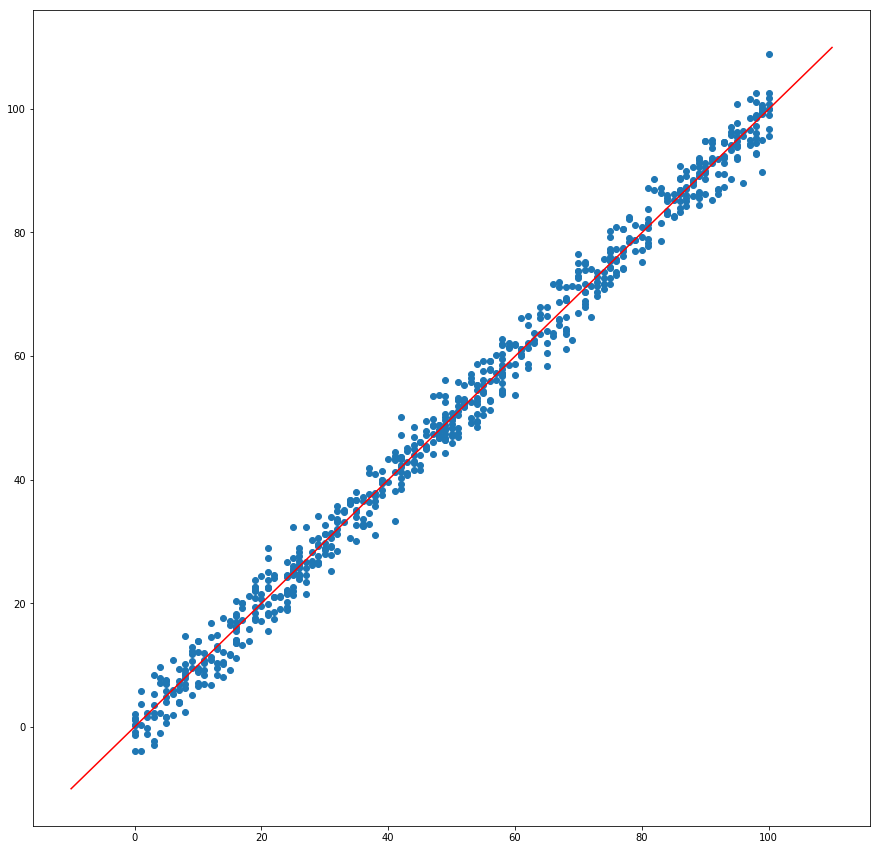

In [85]:
# plotting best fit line against data
x1 = -10
x2 = 110
y1 = b+m*x1
y2 = b+m*x2
plt.figure(figsize=(15,15))
plt.plot([x1,x2],[y1,y2], color="Red")
plt.scatter(x_train,y_train)
plt.show()